# Sandpyper: sandy beaches SfM-UAV analysis tools

Nicolas Pucino; PhD Student @ Deakin University, Australia

In [1]:
!pip install -r requirements.txt

In [2]:
# import ipywidgets as widgets

In [3]:
#import numpy as np
#c = np.array([['b','a','c'],['c','c','a'],['c','b','c'],['a','a','b'],['a','b','c']])
#
#import giddy
#m = giddy.markov.Markov(c)

In [4]:
# import what required

# %matplotlib notebook

from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import rasterio as ras
from rasterio.plot import show

from common import create_transects

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/opt/conda/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/opt/conda/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tr

In [5]:
test_data_folder = r"test_data"

In [6]:
#!pip install ipympl

CRS of St.Leonards data:
   transects = EPSG:32755
   ortho = EPSG:32755
   watermask = EPSG:32754    
   shoremask= EPSG:32754


/tmp/ipykernel_268779/1652227694.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs[1].legend()


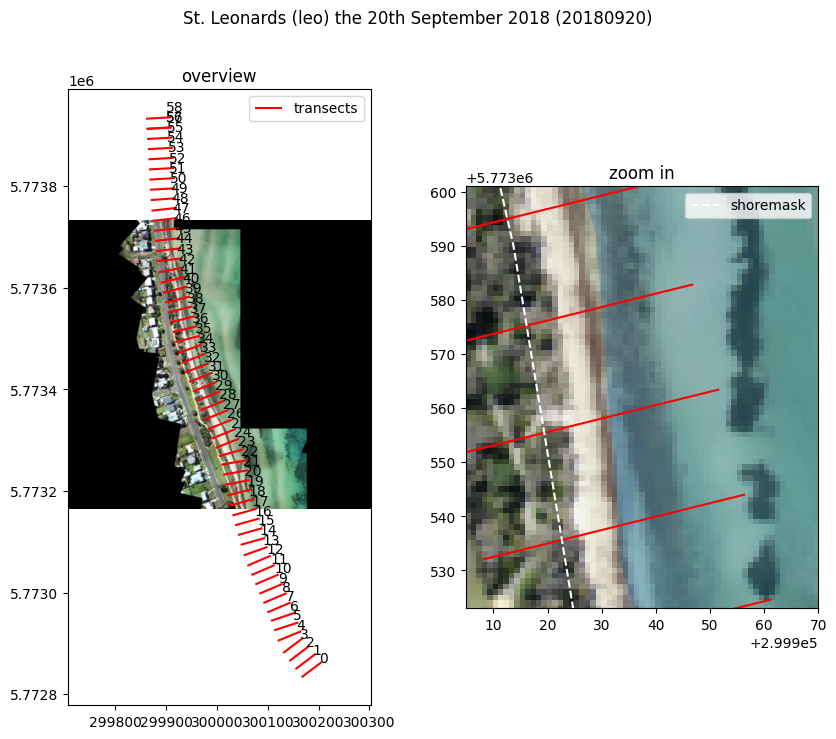

In [7]:
%matplotlib inline

f,axs= plt.subplots(1,2, figsize=(10,8), squeeze=True)

ortho_path=Path(test_data_folder + r"/orthos_1m/leo_20180920_ortho_resampled_1m.tif")
watermasks_path=Path(test_data_folder + r"/clean/watermasks.gpkg")
shoremasks_path=Path(test_data_folder + r"/clean/shoremasks.gpkg")
label_corr_path=Path(test_data_folder + r"/clean/label_corrections.gpkg")
transect_path=Path(test_data_folder + r"/transects/leo_transects.gpkg")
transect_lod_path=Path(test_data_folder + r"/lod_transects/leo_lod_transects.gpkg")

transects=gpd.read_file(transect_path)
watermasks=gpd.read_file(watermasks_path)
shoremasks=gpd.read_file(shoremasks_path)
label_corr=gpd.read_file(label_corr_path)
transect_lod=gpd.read_file(transect_lod_path)

with ras.open(ortho_path,'r') as ortho:
    # plot orthos
    show(ortho, ax=axs[0])
    show(ortho, ax=axs[1])
    
    # plot transects
    transects.plot(ax=axs[0], color='r', label='transects')
    transects.plot(ax=axs[1], color='r')
    
    # plot shoremask
    shoremask_leo_demo=shoremasks.query("location=='leo'") 
    shoremask_leo_demo.to_crs(32755).boundary.plot(ax=axs[1],color='w',linestyle='--',label='shoremask')
    
    # plot watermask
    watermask_leo_demo=watermasks.query("location=='leo' and raw_date==20180920")
    watermask_leo_demo.to_crs(32755).plot(ax=axs[1],alpha=.3,label='watermask')

    # add tr_id labels
    for x, y, label in zip(transects.geometry.centroid.x, transects.geometry.centroid.y, transects.tr_id):
            axs[0].annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points")

    # print coodinate reference systems
    print(f"CRS of St.Leonards data:\n   transects = {transects.crs}\n   ortho = {ortho.crs}\n   watermask = {watermask_leo_demo.crs}\
    \n   shoremask= {shoremask_leo_demo.crs}")
    
    # set up image
    f.suptitle("St. Leonards (leo) the 20th September 2018 (20180920)")
    axs[0].set_title("overview")
    axs[1].set_title("zoom in")
    
    axs[1].set_xlim(299904.9, 299970)
    axs[1].set_ylim(5773523, 5773601)
    
    axs[0].legend()
    axs[1].legend()

# Location codes

In [8]:
# The location codes used troughout the analysis
loc_codes=["mar","leo"]

In [9]:
# The Coordinate Reference Systems used troughout this study

crs_dict_string= {
                 'mar': {'init': 'epsg:32754'},
                 'leo':{'init': 'epsg:32755'}
                 }

In [10]:
# The terms used in the original filenames.
# These will be used to properly format files, extracting location codes.

loc_search_dict = {   'leo': ['St','Leonards','leonards','leo'],
                      'mar': ['Marengo','marengo','mar'] }

# Transects

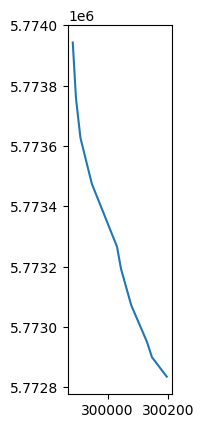

In [11]:
%matplotlib inline
# load and display the shoreline
shoreline_path=r"test_data/shorelines/leo_shoreline_short.gpkg"

shoreline=gpd.read_file(shoreline_path)
shoreline.plot();

/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tr_id,geometry,location
0,0,"LINESTRING (300166.471 5772833.267, 300206.279...",leo
1,1,"LINESTRING (300154.369 5772849.190, 300194.177...",leo
2,2,"LINESTRING (300142.267 5772865.113, 300182.075...",leo
3,3,"LINESTRING (300130.166 5772881.037, 300169.974...",leo
4,4,"LINESTRING (300119.411 5772904.944, 300165.639...",leo


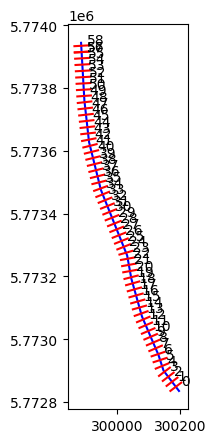

In [12]:
# create and display the transects (in red), give the shoreline (in blu)
%matplotlib inline

f,ax=plt.subplots(figsize=(5,5))  # Change figsize if you want bigger images
location='leo'  # insert the location code for this transect file.

transects=create_transects(shoreline,
                           sampling_step=20, # alongshore transect spacing in meters
                           tick_length=50, # transects length in meters
                           location=location,
                           crs=crs_dict_string[location],
                           side='both' # 'both':transect is centered at the interesction with the baseline
                          )

# Modify the figure by plotting shoreline, transects and transect IDs.
shoreline.plot(ax=ax,color='b')
transects.plot(ax=ax,color='r')

for x, y, label in zip(transects.geometry.centroid.x, transects.geometry.centroid.y, transects.tr_id):
    ax.annotate(label, xy=(x, y), xytext=(4, 1), textcoords="offset points")

transects.head()